In [2]:
import torch

In [4]:
from IPython.display import Image #this is to render predictions

In [7]:
%cd yolov5

C:\Users\91892\Desktop\PIX DYNAMICS\yolo\yolov5


In [4]:
import yaml

# Devide dataset into trainig and validation sets

In [1]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

trainPath = 'C:/Users/91892/Desktop/PIX DYNAMICS/yolo/dataset/images/train'
valPath = 'C:/Users/91892/Desktop/PIX DYNAMICS/yolo/dataset/images/val'
crsPath = 'C:/Users/91892/Desktop/PIX DYNAMICS/yolo/Data/ts'


#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  592
Validation images are :  148


In [3]:
trainimagePath = 'C:/Users/91892/Desktop/PIX DYNAMICS/yolo/dataset/images/train'
trainlabelPath = 'C:/Users/91892/Desktop/PIX DYNAMICS/yolo/dataset/labels/train'
valimagePath = 'C:/Users/91892/Desktop/PIX DYNAMICS/yolo/dataset/images/val'
vallabelPath = 'C:/Users/91892/Desktop/PIX DYNAMICS/yolo/dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath) 

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/91892/Desktop/PIX DYNAMICS/yolo/Data/ts\\00650.jpg'

In [ ]:
python train.py --img 415 --batch 4 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache

In [ ]:
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=30, batch_size=4, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5
fatal: cannot change to 'C:\Users\91892\Desktop\PIX': No such file or directory
YOLOv5  2023-6-3 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
ClearML: run 'pip install clearml' to automatically track, visualize and remotely train YOLOv5  in ClearML
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5  runs in Comet
TensorBoard: Start with 'tensorboard --logdir runs\train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=4

                 from  n    params  module                                  arguments
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]
  2                -1  1     18816  models.common.C3                        [64, 64, 1]
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]
  4                -1  2    115712  models.common.C3                        [128, 128, 2]
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]
  6                -1  3    625152  models.common.C3                        [256, 256, 3]
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]
  8                -1  1   1182720  models.common.C3                        [512, 512, 1]
  9                -1  1    656896  models.common.SPPF                      [512, 512, 5]
 10                -1  1    131584  models.common.Conv                      [512, 256, 1, 1]
 11                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']
 12           [-1, 6]  1         0  models.common.Concat                    [1]
 13                -1  1    361984  models.common.C3                        [512, 256, 1, False]
 14                -1  1     33024  models.common.Conv                      [256, 128, 1, 1]
 15                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']
 16           [-1, 4]  1         0  models.common.Concat                    [1]
 17                -1  1     90880  models.common.C3                        [256, 128, 1, False]
 18                -1  1    147712  models.common.Conv                      [128, 128, 3, 2]
 19          [-1, 14]  1         0  models.common.Concat                    [1]
 20                -1  1    296448  models.common.C3                        [256, 256, 1, False]
 21                -1  1    590336  models.common.Conv                      [256, 256, 3, 2]
 22          [-1, 10]  1         0  models.common.Concat                    [1]
 23                -1  1   1182720  models.common.C3                        [512, 512, 1, False]
 24      [17, 20, 23]  1     24273  models.yolo.Detect                      [4, [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], [128, 256, 512]]
Model summary: 214 layers, 7030417 parameters, 7030417 gradients, 16.0 GFLOPs

Transferred 343/349 items from yolov5s.pt
AMP: checks passed
WARNING  --img-size 415 must be multiple of max stride 32, updating to 416
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 60 weight(decay=0.0005), 60 bias
train: Scanning C:\Users\91892\Desktop\PIX DYNAMICS\yolo\dataset\labels\train.cache... 592 images, 0 backgrounds, 0 cor
train: WARNING  C:\Users\91892\Desktop\PIX DYNAMICS\yolo\dataset\images\train\00340.jpg: 1 duplicate labels removed
train: Caching images (0.2GB ram): 100%|██████████| 592/592 [00:02<00:00, 200.34it/s]
val: Scanning C:\Users\91892\Desktop\PIX DYNAMICS\yolo\dataset\labels\val.cache... 148 images, 741 backgrounds, 0 corru
val: Caching images (0.3GB ram): 100%|██████████| 889/889 [00:05<00:00, 174.32it/s]

AutoAnchor: 3.23 anchors/target, 1.000 Best Possible Recall (BPR). Current anchors are a good fit to dataset
Plotting labels to runs\train\exp8\labels.jpg...
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs\train\exp8
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       0/29     0.724G    0.09716    0.01134    0.03416         19        416: 100%|██████████| 148/148 [00:23<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239   3.26e-05     0.0106    1.7e-05    3.7e-06

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       1/29     0.724G    0.07702    0.01253    0.02884         20        416: 100%|██████████| 148/148 [00:18<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239   0.000314      0.226    0.00126   0.000378

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       2/29     0.724G    0.05972    0.01377    0.02784         15        416: 100%|██████████| 148/148 [00:17<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239      0.516     0.0212       0.01    0.00306

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       3/29     0.724G    0.05176    0.01297    0.02654         10        416: 100%|██████████| 148/148 [00:18<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239       0.52     0.0784     0.0167    0.00497

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       4/29     0.724G    0.04718    0.01136    0.02511          4        416: 100%|██████████| 148/148 [00:17<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239      0.769     0.0805     0.0191    0.00821

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       5/29     0.724G    0.04699    0.01029    0.02457         15        416: 100%|██████████| 148/148 [00:17<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239      0.299      0.167     0.0331     0.0145

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       6/29     0.724G    0.04064   0.008997    0.02251         12        416: 100%|██████████| 148/148 [00:17<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239      0.308      0.253     0.0447     0.0214

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       7/29     0.724G    0.03799   0.008673     0.0204          7        416: 100%|██████████| 148/148 [00:17<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239       0.34      0.261     0.0649     0.0317

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       8/29     0.724G    0.04005   0.008717    0.01901         17        416: 100%|██████████| 148/148 [00:17<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239      0.343      0.271     0.0718     0.0312

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       9/29     0.724G    0.03569   0.007856    0.01787         14        416: 100%|██████████| 148/148 [00:17<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239      0.332      0.305     0.0747     0.0345

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      10/29     0.724G    0.03679   0.008285    0.01691         19        416: 100%|██████████| 148/148 [00:18<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239      0.104       0.45     0.0796     0.0396

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      11/29     0.724G    0.03386     0.0077    0.01507          8        416: 100%|██████████| 148/148 [00:18<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239      0.126      0.504      0.101     0.0562

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      12/29     0.724G    0.03408   0.007551     0.0132          5        416: 100%|██████████| 148/148 [00:21<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239       0.13      0.473      0.115     0.0595

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      13/29     0.724G    0.03352   0.007412    0.01138         12        416: 100%|██████████| 148/148 [00:18<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239      0.129      0.593      0.118      0.059

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      14/29     0.724G    0.03257   0.007293    0.01077          9        416: 100%|██████████| 148/148 [00:20<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239       0.14      0.573      0.132     0.0684

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      15/29     0.724G    0.03045   0.007047   0.009538          6        416: 100%|██████████| 148/148 [00:18<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239      0.142      0.603      0.129      0.063

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      16/29     0.724G    0.03137   0.006804   0.008458          6        416: 100%|██████████| 148/148 [00:17<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239      0.146      0.613      0.137     0.0752

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      17/29     0.724G    0.02935   0.006686   0.007732          8        416: 100%|██████████| 148/148 [00:17<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239      0.143      0.606      0.133     0.0683

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      18/29     0.724G    0.02935   0.006883   0.007133          8        416: 100%|██████████| 148/148 [00:17<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:
                   all        889        239      0.141      0.658      0.137     0.0776

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      19/29     0.724G    0.02846   0.006593   0.006783          8        416: 100%|██████████| 148/148 [00:18<00:00,
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:10<00:00, 10.86it/s]
                   all        889        239      0.144      0.624      0.138     0.0805

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      20/29     0.724G    0.02864   0.006503   0.006262         10        416: 100%|██████████| 148/148 [00:18<00:00,  7.83it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:09<00:00, 11.70it/s]
                   all        889        239      0.142      0.619      0.134     0.0742

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      21/29     0.724G    0.02725   0.006049   0.006238          7        416: 100%|██████████| 148/148 [00:19<00:00,  7.59it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:09<00:00, 12.28it/s]
                   all        889        239      0.142      0.658      0.142     0.0844

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      22/29     0.724G    0.02653   0.005875   0.005618         13        416: 100%|██████████| 148/148 [00:17<00:00,  8.43it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:09<00:00, 12.08it/s]
                   all        889        239      0.144      0.624      0.138     0.0821

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      23/29     0.724G    0.02545   0.005705   0.005688          9        416: 100%|██████████| 148/148 [00:26<00:00,  5.53it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:11<00:00,  9.89it/s]
                   all        889        239      0.148      0.637      0.143     0.0812

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      24/29     0.724G    0.02343   0.005773   0.005215          6        416: 100%|██████████| 148/148 [00:21<00:00,  6.91it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:10<00:00, 10.55it/s]
                   all        889        239      0.145      0.665      0.141     0.0838

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      25/29     0.724G    0.02375   0.005494   0.004798         11        416: 100%|██████████| 148/148 [00:19<00:00,  7.45it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:10<00:00, 10.35it/s]
                   all        889        239      0.147      0.632      0.137     0.0835

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      26/29     0.724G      0.023    0.00582   0.004963          9        416: 100%|██████████| 148/148 [00:21<00:00,  6.91it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:10<00:00, 10.49it/s]
                   all        889        239      0.148      0.625      0.138     0.0828

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      27/29     0.724G    0.02267   0.005427   0.004583          7        416: 100%|██████████| 148/148 [00:20<00:00,  7.28it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:10<00:00, 10.82it/s]
                   all        889        239      0.145      0.641      0.138     0.0846

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      28/29     0.724G     0.0213   0.005554   0.004192         15        416: 100%|██████████| 148/148 [00:20<00:00,  7.28it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:10<00:00, 10.83it/s]
                   all        889        239      0.147      0.622      0.141     0.0881

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      29/29     0.724G    0.02059    0.00563   0.003907         13        416: 100%|██████████| 148/148 [00:20<00:00,  7.31it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:10<00:00, 10.53it/s]
                   all        889        239       0.15      0.628      0.137      0.085

30 epochs completed in 0.249 hours.
Optimizer stripped from runs\train\exp8\weights\last.pt, 14.3MB
Optimizer stripped from runs\train\exp8\weights\best.pt, 14.3MB

Validating runs\train\exp8\weights\best.pt...
Fusing layers...
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 112/112 [00:11<00:00,  9.67it/s]
                   all        889        239      0.147      0.624      0.142     0.0885
           speed limit        889        118      0.161      0.734      0.161      0.102
                 yield        889         42       0.16      0.738      0.156        0.1
             mandatory        889         29      0.126      0.483      0.142     0.0876
                 other        889         50      0.142       0.54      0.108     0.0642
Results saved to runs\train\exp8


In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

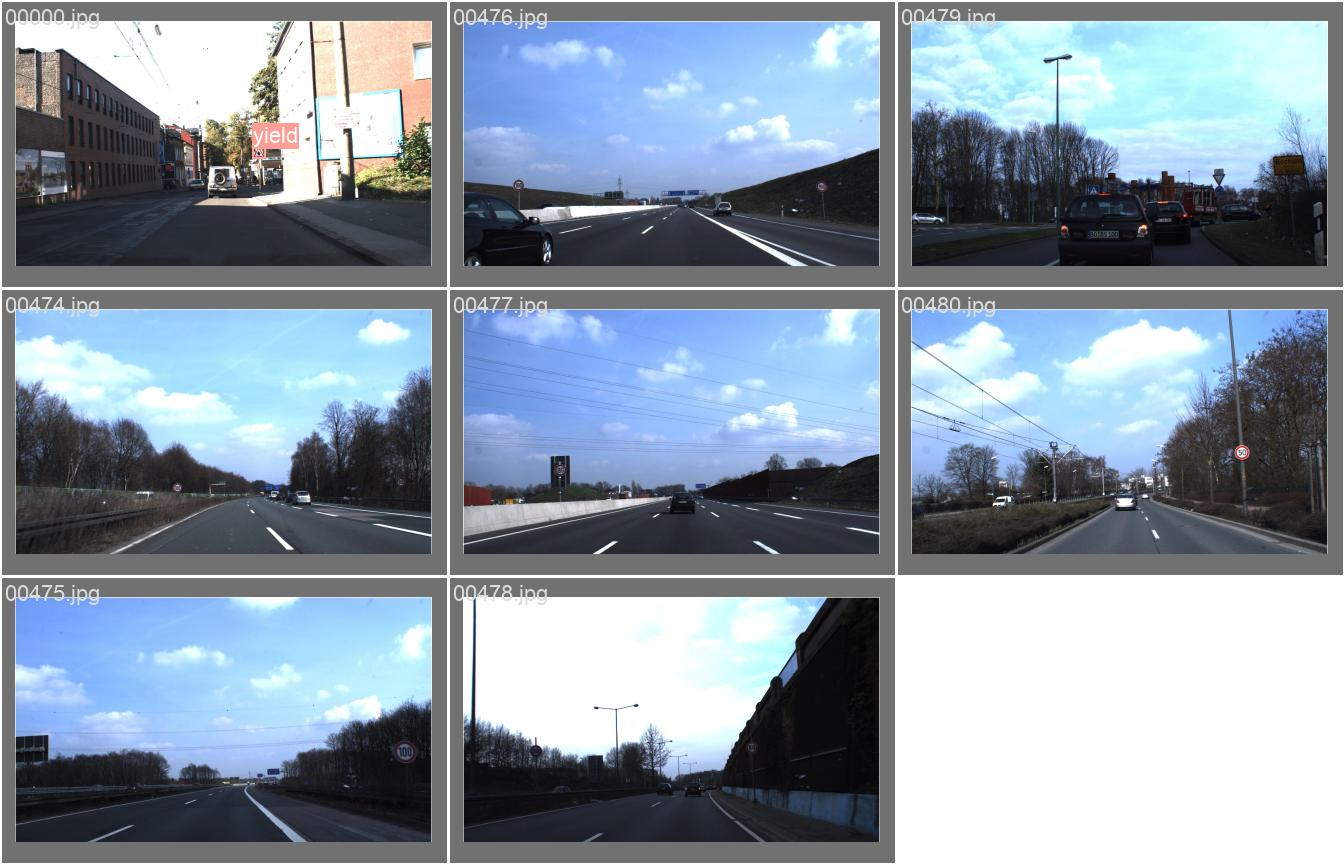

In [8]:
Image(filename='runs/train/exp8/val_batch0_labels.jpg', width=1000)

In [13]:
!python detect.py --source runs/train/exp8/val_batch0_labels.jpg --weights best.pt

Traceback (most recent call last):
  File "C:\Users\91892\Desktop\PIX DYNAMICS\yolo\yolov5\detect.py", line 45, in <module>
    from models.common import DetectMultiBackend
  File "C:\Users\91892\Desktop\PIX DYNAMICS\yolo\yolov5\models\common.py", line 18, in <module>
    import cv2
ModuleNotFoundError: No module named 'cv2'


In [12]:
!pip install opencv-python